In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [10]:
# Fetch the California housing dataset
california = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable (house prices)
df['Price'] = california.target

# Display first five rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [11]:
print("\nData Info\n",df.info())
print("\nSummary Statistics:\n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Data Info
 None

Summary Statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.84615

In [13]:
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

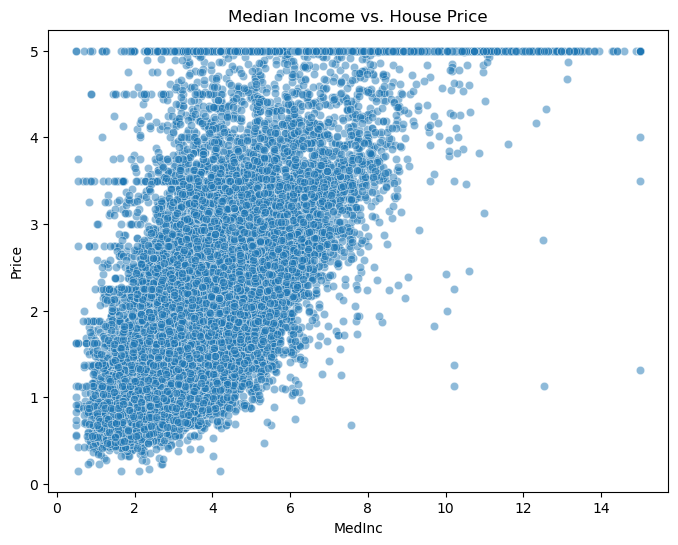

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc', y='Price', data=df, alpha=0.5)
plt.title('Median Income vs. House Price')
plt.show()


In [16]:
print("\nCorrelation with Price:\n",df.corr()['Price'].sort_values)


Correlation with Price:
 <bound method Series.sort_values of MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Price         1.000000
Name: Price, dtype: float64>


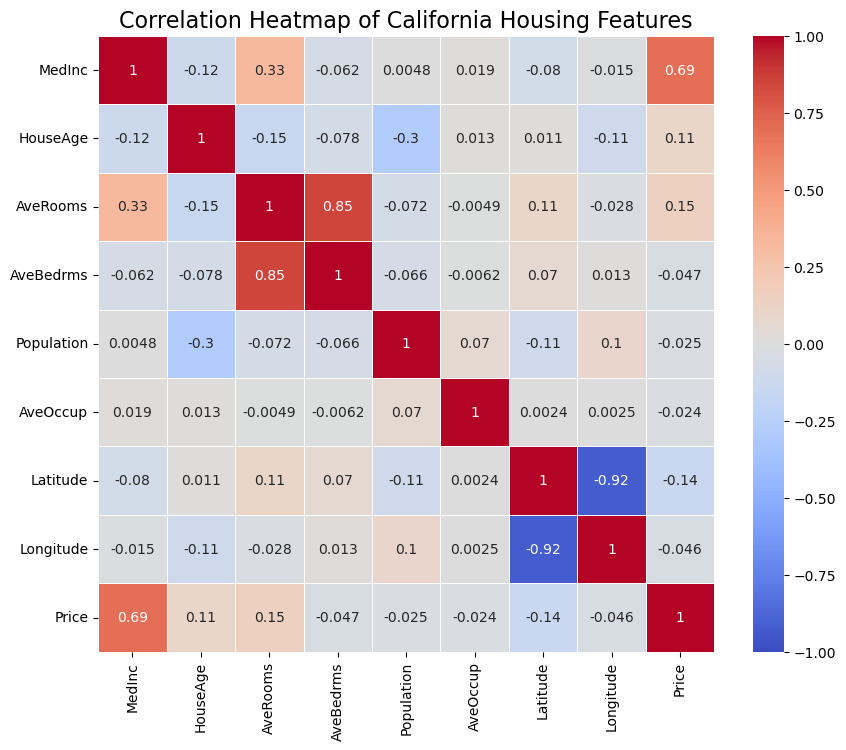

In [17]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0,square=True,linewidth=0.5)
plt.title('Correlation Heatmap of California Housing Features',fontsize=16)
plt.show()

In [18]:
X=df[['MedInc']]
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f"\nLinear Equation: Price={model.coef_[0]:.2f} * MedInc+{model.intercept_:.2f}")


Linear Equation: Price=0.42 * MedInc+0.44


In [20]:
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"\nMAE:{mae:.2f}$100k")
print(f"RMSE:{rmse:.2f}$100k")
print(f"R²: {r2:.2f}")



MAE:0.63$100k
RMSE:0.84$100k
R²: 0.46


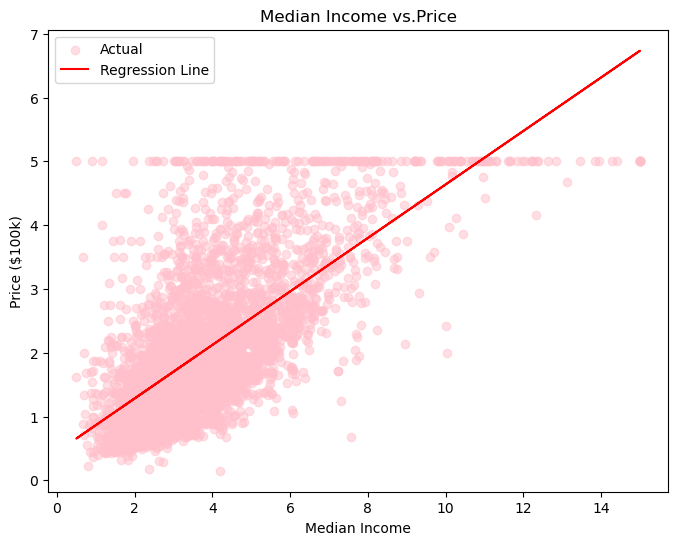

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test,color='pink',label='Actual',alpha=0.5)
plt.plot(X_test,y_pred,color='red',label='Regression Line')
plt.title('Median Income vs.Price')
plt.xlabel('Median Income')
plt.ylabel('Price ($100k)')
plt.legend()
plt.show()